In [16]:
from pathlib import Path

import pandas as pd
from pandas.errors import EmptyDataError 

import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

In [2]:
# Given parameters:
# 1) detection_dir is the recover-DATE-UNIT_NUM-detect folder
# 2) recording_name is the name of our recording: DATE_TIME.WAV
# 4) det_type can either be 'lf' or 'hf'

# Output:
# The table of detections following the format of RavenPro

def read_detection(detection_dir, recording_name, det_type):
    
    file_name = f"{det_type}_{recording_name}.txt"
    file_path = f"{detection_dir}/{file_name}"
    
    if (Path(file_path).is_file()):
        try:
            df_detection = pd.read_csv(file_path, sep='\t')
        except EmptyDataError:
            print(f"{file_path} is empty")
            
    return df_detection

In [80]:
# These are variables that will help us point to specific folders and files

# Constant DATE is the date of our recovered data that we are extracting detections from
DATE = "20220725"
# Constant UNIT_NUM is the SD CARD # that had been deployed for that session
UNIT_NUM = "010"
# Constant duration of audio file that we configured into Audiomoth
AUDIO_DUR = pd.DateOffset(minutes=29, seconds=55)

# detection_dir is the recover-DATE-UNIT_NUM-detect folder where our detections are.
detection_dir = f"detections/recover-{DATE}-{UNIT_NUM}-detect"

# Construct path object linked to the directory of files for datetime-parsing
file_dir = Path(detection_dir)
# Extract only the hf-detection files because the datetime information is repeated.
sorted_files = sorted(file_dir.glob('hf_*.txt'))

# We fill the first 3 columns of our dataframe right here using dateutils parser
file_names = []
dates = []
s_times = []
e_times = []
# We fill out the next 2 columns of data regarding the number of LF and HF selections
num_lf_detections = []
num_hf_detections = []

In [81]:
# Iterate through all file paths to extract and store table information for each file
for i, file in enumerate(sorted_files):
    # Extract name of each file as it is
    file_name = file.name
    # Extracting the datetime object from the name of each file
    file_info = datetime.strptime(file_name, "hf_%Y%m%d_%H%M%S.WAV.txt")
    
    # Extract recording name, date, start time, and end time for each file
    recording_name = file_info.strftime("%Y%m%d_%H%M%S.WAV")
    date = file_info.date()
    s_time = file_info.time()
    e_time = (file_info + AUDIO_DUR).time()
    
    # Appending the above properties to be displayed as part of the dataframe
    file_names.append(recording_name)
    dates.append(date)
    s_times.append(s_time)
    e_times.append(e_time)
        
    # Calling read_detection to return the table of selections as a dataframe
    # The detections appear twice: in waveform view and spectrogram view, 
    # so we half the total number of detections
    lf_file_detections = read_detection(detection_dir, recording_name, "lf")
    num_lf_detections.append(lf_file_detections.shape[0]/2)
    hf_file_detections = read_detection(detection_dir, recording_name, 'hf')
    num_hf_detections.append(hf_file_detections.shape[0]/2)

In [82]:
df = pd.DataFrame([file_names, dates, s_times, e_times, num_lf_detections, num_hf_detections], 
                  index=["File Names", "Date", "Start Time (UTC)", "End Time (UTC)", "# of LF detections", "# of HF detections"]).T
df

File Names        Date Start Time (UTC) End Time (UTC)  \
0   20220723_000000.WAV  2022-07-23         00:00:00       00:29:55   
1   20220723_003000.WAV  2022-07-23         00:30:00       00:59:55   
2   20220723_010000.WAV  2022-07-23         01:00:00       01:29:55   
3   20220723_013000.WAV  2022-07-23         01:30:00       01:59:55   
4   20220723_020000.WAV  2022-07-23         02:00:00       02:29:55   
..                  ...         ...              ...            ...   
91  20220724_213000.WAV  2022-07-24         21:30:00       21:59:55   
92  20220724_220000.WAV  2022-07-24         22:00:00       22:29:55   
93  20220724_223000.WAV  2022-07-24         22:30:00       22:59:55   
94  20220724_230000.WAV  2022-07-24         23:00:00       23:29:55   
95  20220724_233000.WAV  2022-07-24         23:30:00       23:59:55   

   # of LF detections # of HF detections  
0                 0.0                0.0  
1                 0.0                0.0  
2                 0.0                0.0  
3                 0.0                0.0  
4                 0.0                0.0  
..                ...                ...  
91                0.0                0.0  
92                0.0                0.0  
93                0.0                0.0  
94                2.0                0.0  
95                0.0                0.0  

[96 rows x 6 columns]

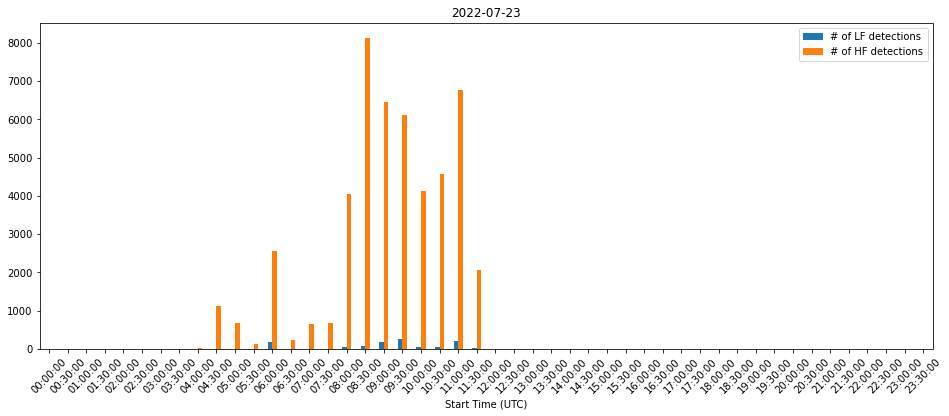

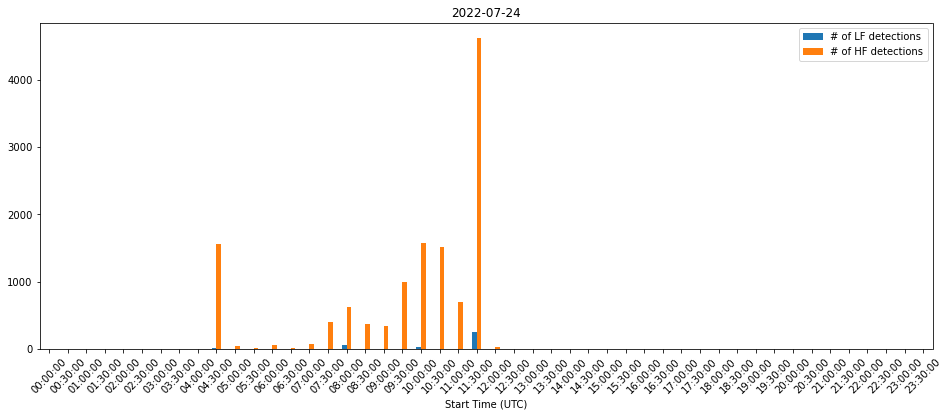

In [86]:
# To plot each day's activity separately, group by rows that have the same date
# We need a list of unique dates from our detection files
unique_dates = df["Date"].unique()

for date in unique_dates:
    day_df = df.loc[df['Date'] == date]
    day_df.plot.bar(x="Start Time (UTC)", title=date, figsize=(16, 6), rot=45)

<AxesSubplot:title={'center':'Total Deployment Session'}, xlabel='Start Time (UTC)'>

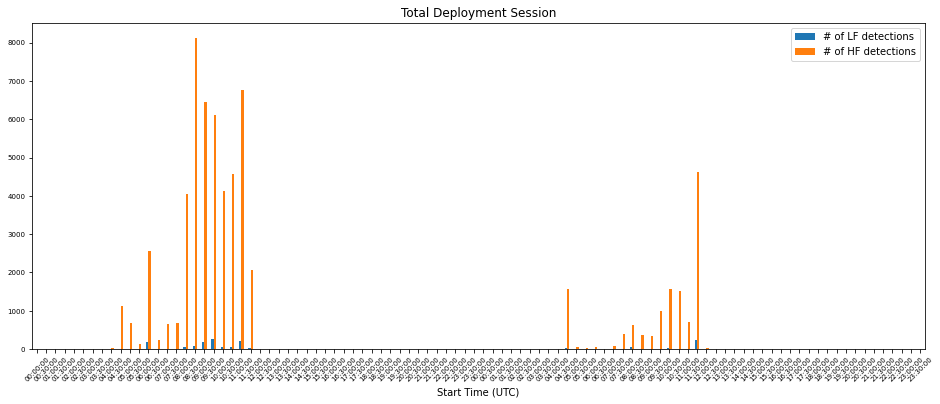

In [84]:
df.plot.bar(x="Start Time (UTC)", title="Total Deployment Session", figsize=(16, 6), fontsize=7, rot=45)